# import library and load dataset

In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
data=pd.read_csv('my_movies.csv')
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [5]:
data.shape

(10, 15)

In [6]:
df1=data.iloc[:,0:5]
df1.head()

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN


In [7]:
df2=pd.get_dummies(df1)
df2

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [8]:
df3=data.iloc[:,5:15]
df3.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [9]:
movies=df3.melt(var_name='Movies',value_name='Values')
movies

,Movies,Values
0,Sixth Sense,1
1,Sixth Sense,0
2,Sixth Sense,0
3,Sixth Sense,1
4,Sixth Sense,1
...,...,...
95,Green Mile,0
96,Green Mile,0
97,Green Mile,0
98,Green Mile,0


In [10]:
movies1=pd.crosstab(index=movies['Values'],columns=movies['Movies'])
movies1

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Values,,,,,,,,,,
0,9,3,8,8,9,9,8,8,4,4
1,1,7,2,2,1,1,2,2,6,6


<AxesSubplot:xlabel='Movies'>

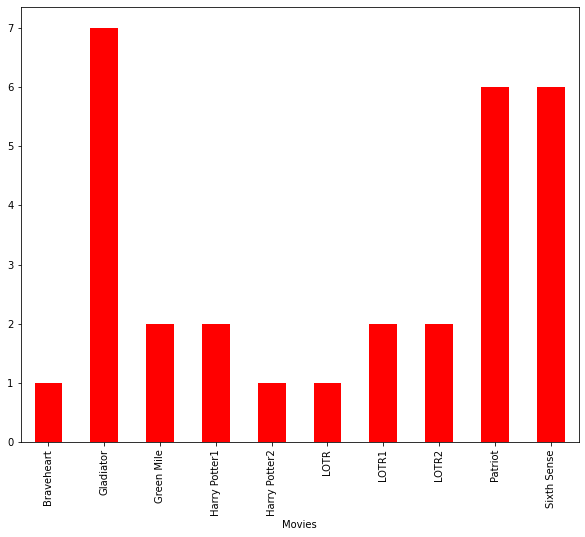

In [11]:
plt.figure(figsize=(10,8))
movies1.iloc[1,:].plot(kind='bar', color = 'red')

<AxesSubplot:xlabel='Movies'>

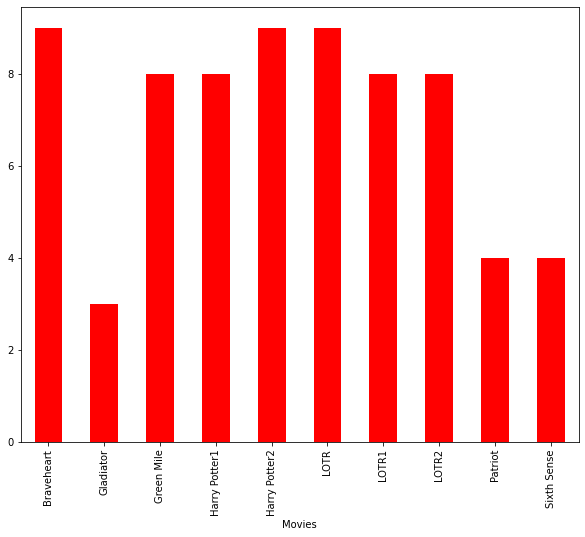

In [12]:
plt.figure(figsize=(10,8))
movies1.iloc[0,:].plot(kind='bar', color = 'red')

In [13]:
#counting how many movies are watched
movies1.index = ['Not_Watched', 'Watched']
movies1

Movies,Braveheart,Gladiator,Green Mile,Harry Potter1,Harry Potter2,LOTR,LOTR1,LOTR2,Patriot,Sixth Sense
Not_Watched,9,3,8,8,9,9,8,8,4,4
Watched,1,7,2,2,1,1,2,2,6,6


In [14]:
print("Maximum Watched movie:" ,movies1.idxmax(axis=1)[1],':',movies1.loc['Watched'].max())
print("Least Watched movie:" ,movies1.idxmax(axis=1)[0],':',movies1.loc['Not_Watched'].max())

Maximum Watched movie: Gladiator : 7
Least Watched movie: Braveheart : 9


In [15]:
sort_df = pd.DataFrame(movies1.sort_values(by = ['Watched'], axis=1, ascending=False).transpose())
sort_df

,Not_Watched,Watched
Movies,,
Gladiator,3,7
Patriot,4,6
Sixth Sense,4,6
Green Mile,8,2
Harry Potter1,8,2
LOTR1,8,2
LOTR2,8,2
Braveheart,9,1
Harry Potter2,9,1


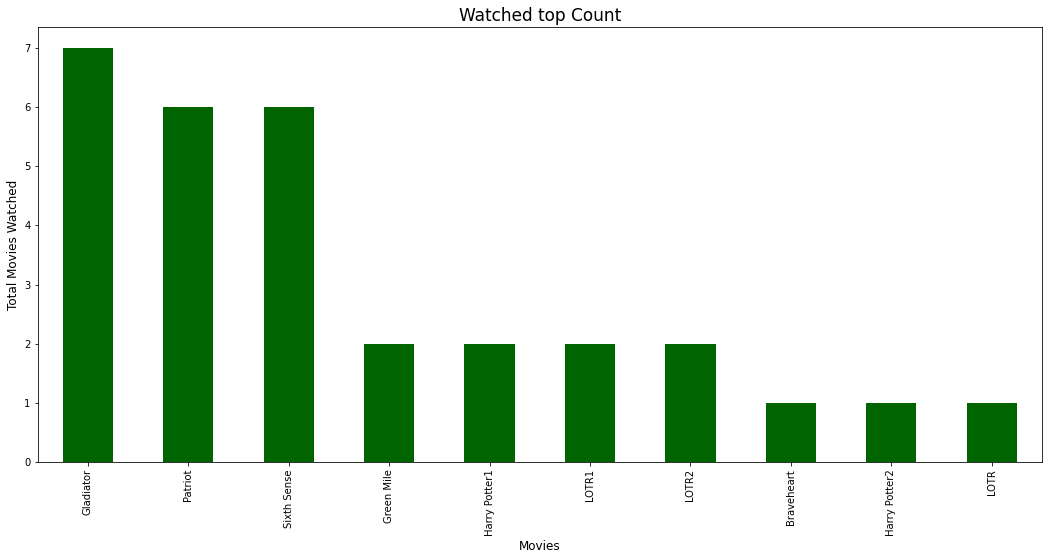

In [16]:
fig = plt.subplots(figsize=(18,8))
Watched = sort_df.head(50).xs('Watched' , axis=1)
Watched.plot(kind='bar', fontsize=10, color = 'darkgreen')
plt.title('Watched top Count',fontsize=17)
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Total Movies Watched', fontsize=12)
plt.show()

# Apriori Algoritham 

In [18]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items1 = apriori(df3, min_support=0.10, max_len = 4, use_colnames=True)
freq_items1.sort_values('support', ascending = False, inplace = True)
freq_items1.tail()

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
24,0.1,"(LOTR2, Harry Potter1)"
25,0.1,"(Harry Potter2, Harry Potter1)"
27,0.1,"(Braveheart, Patriot)"
28,0.1,"(Green Mile, LOTR2)"
51,0.1,"(LOTR1, Green Mile, LOTR2, Harry Potter1)"


In [19]:
#generating rules
rules1 = association_rules(freq_items1, metric="lift", min_threshold=1)
rules1.sort_values('lift',ascending = False, inplace=True) #sorted with lift > 1
rules1.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
116,"(Sixth Sense, Gladiator)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0
119,(Green Mile),"(Sixth Sense, Gladiator)",0.2,0.5,0.1,0.500000,1.000000,0.00,1.0


# Removing Redundancy

In [ ]:
redundancy = rules1.sort_values(by=['leverage','confidence'], axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.head()

# Finding Unique Sets

In [21]:
unique_rules = redundancy.iloc[::1]
unique_rules.shape

(208, 9)

In [22]:
unique_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


# Generated Rules analysis

In [23]:
#Rules sorted with respect to lift
top_sort = unique_rules[unique_rules['lift']>1.5]

In [24]:
top_sored = top_sort.sort_values(by='lift', ascending = False)
top_sort.reset_index(inplace=True)
top_sort = top_sort.drop(['index'],axis=1)
top_sort.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
1,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
3,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
4,"(LOTR1, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [31]:
x = top_sort[['antecedents','consequents']]

In [33]:
# top sorted Antecedents
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list.append(j)

In [34]:
# top sorted consequents
item_list = []
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [41]:
#generating unique list of items (# without redundacy)

def unique(list1):
    # insert the list to the set 
    list_set = set(list1)
 
    # convert the set to the list 
    unique_list = (list(list_set))
 
    top_items =[]
    for m in unique_list:
        top_items.append(m) 
 
    print(top_items)

In [42]:
### Concluding top_items and the shuffled combination of top lift result
unique(item_list)

['LOTR1', 'Sixth Sense', 'Harry Potter1', 'LOTR', 'Braveheart', 'LOTR2', 'Patriot', 'Green Mile', 'Gladiator', 'Harry Potter2']


# Trying different values of Min_support, Metric, Max_len, and Min_thershold

In [45]:
frequent_movies_s = apriori(df3, min_support = 0.005, max_len = 3, use_colnames = True)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
#sorting with respect to support
frequent_movies_s.sort_values("support", ascending = False, inplace = True)

In [47]:
#generating association rules
rules = association_rules(frequent_movies_s, metric = "lift", min_threshold= 1)

In [48]:
#sorting rules with respect to lift
rules.sort_values('lift', ascending = False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
83,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
81,"(LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
70,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
67,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
64,(LOTR2),"(LOTR1, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
58,(Green Mile),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [49]:
# Min_support = 0.1, Max_len = 5, Lift, Min_threshold=10
frequent_movies_2 = apriori(df3, min_support = 0.1, max_len = 5, use_colnames = True)
rules2 = association_rules(frequent_movies_2, metric = "lift", min_threshold= 10)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [50]:

## Min_support = 0.2, Max_len = 4, Lift, Min_threshold=75%
frequent_movies_3 = apriori(df3, min_support = 0.2, max_len = 4, use_colnames = True)
rules2 = association_rules(frequent_movies_3, metric = "lift", min_threshold=0.75)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [51]:
## Min_support = 0.1, Max_len = 3, Lift, Min_threshold=1
frequent_movies_4 = apriori(df3, min_support = 0.1, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_4, metric = "lift", min_threshold= 1)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [52]:
## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1.5
frequent_movies_5 = apriori(df3, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_5, metric = "confidence", min_threshold= 1.5)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [53]:
## Min_support = 0.2, Max_len = 3, Confidence, Min_threshold = 1
frequent_movies_6 = apriori(df3, min_support = 0.2, max_len = 3, use_colnames = True)
rules2 = association_rules(frequent_movies_6, metric = "confidence", min_threshold= 1)

C:\Users\hp\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# BAR-PLOT

Text(0, 0.5, 'Support')

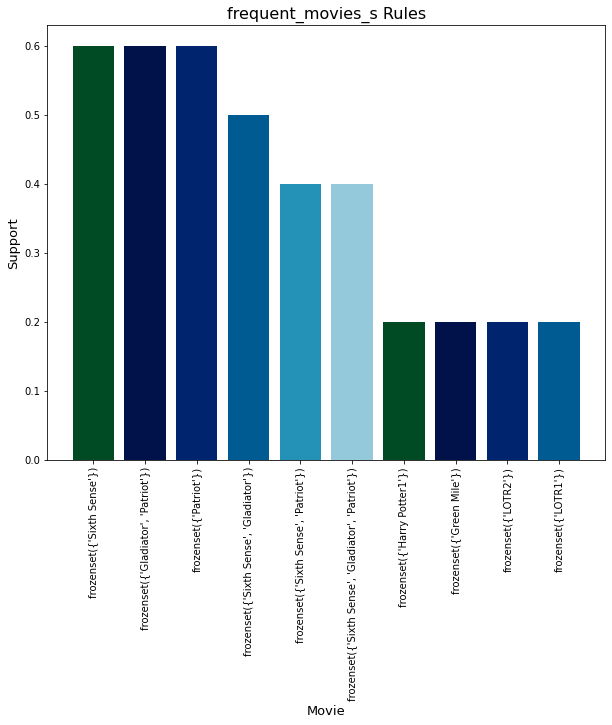

In [54]:
#frequent_movies_s
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_s.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_s.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_s Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

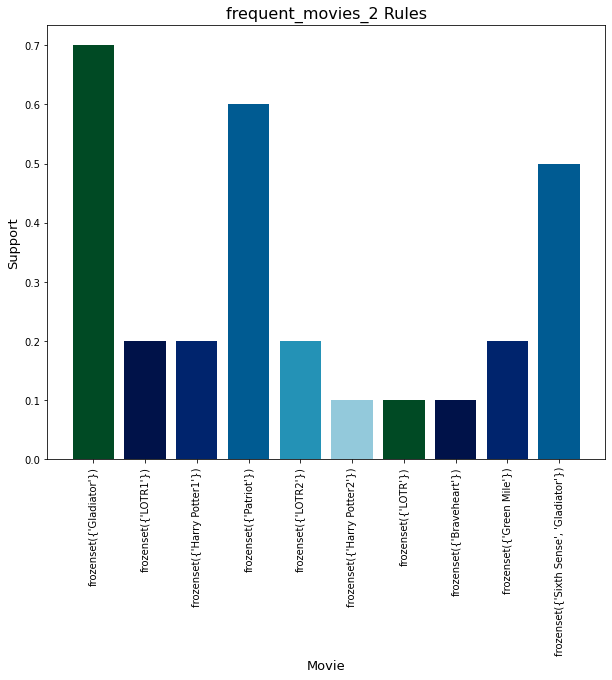

In [55]:
#frequent_movies_2
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_2.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_2.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

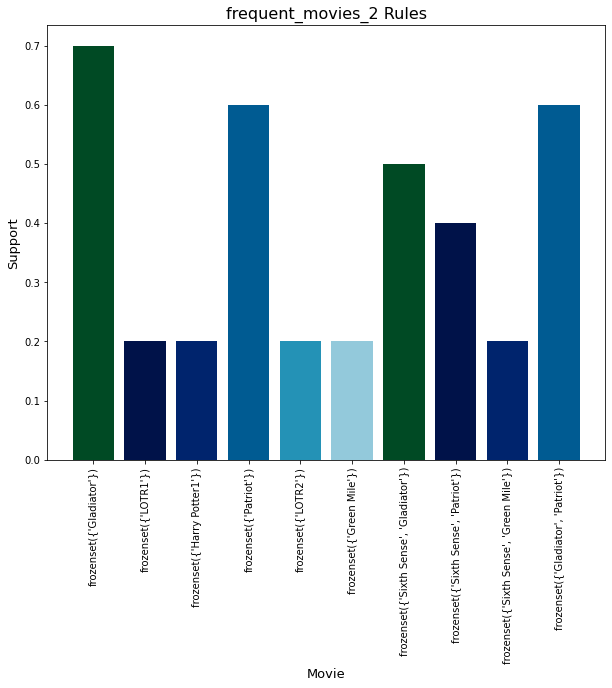

In [56]:
#frequent_movies_3
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_3.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_3.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

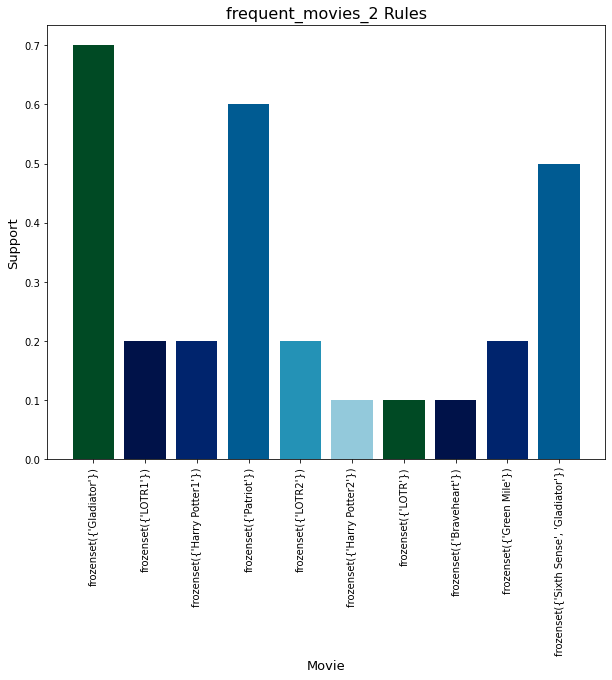

In [57]:
#frequent_movies_4
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_4.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_4.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

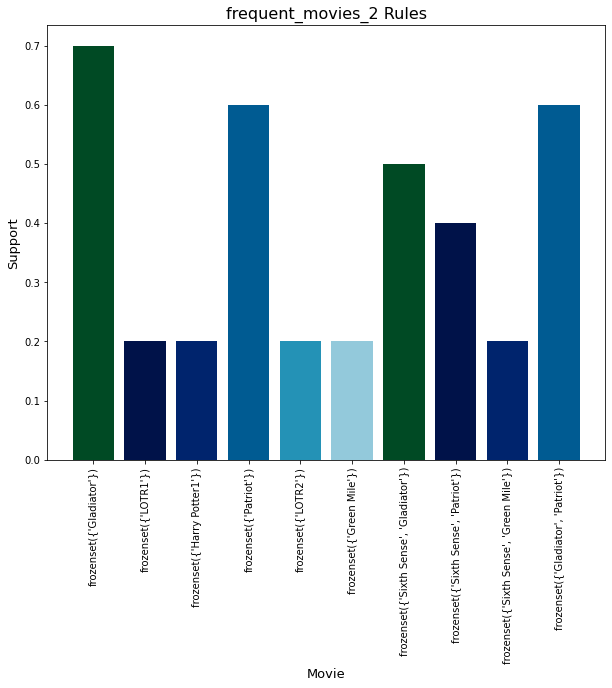

In [58]:
#frequent_movies_5
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_5.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_5.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)

Text(0, 0.5, 'Support')

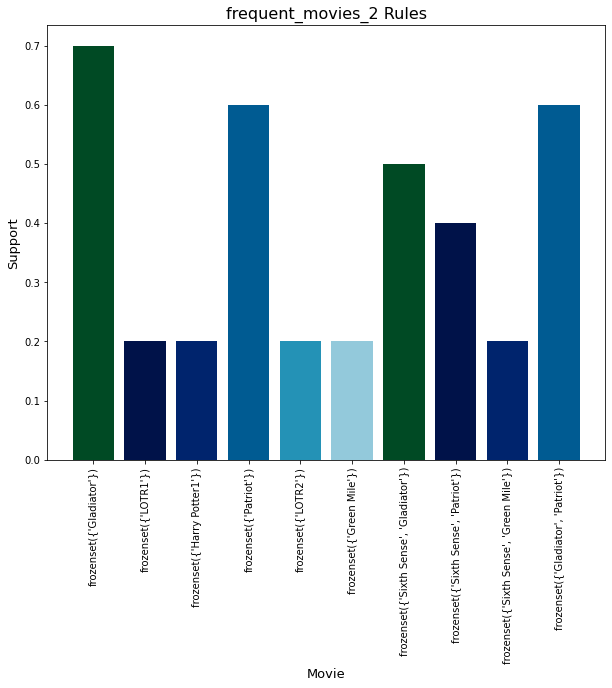

In [59]:
#frequent_movies_6
plt.figure(figsize = (10,8))
plt.bar(x=list(range(1,11)),height=frequent_movies_6.support[1:11], color = sns.color_palette ('ocean'))
plt.xticks(list(range(1,11)),frequent_movies_6.itemsets[1:11],rotation ='vertical')
plt.title('frequent_movies_2 Rules', fontsize = 16)
plt.xlabel('Movie', fontsize = 13)
plt.ylabel('Support', fontsize = 13)